# Homework 5: Boosting and PCA


This assignment is due on Moodle by **11:59pm on Friday November 22**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc.
- **Unzip the files in data folder**


Name:

In [120]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

[40 points] Problem 1 - Principal Component Analysis
---

In this problem you'll be implementing Dimensionality reduction using Principal Component Analysis technique. 

The gist of PCA Algorithm to compute principal components is follows:
- Calculate the covariance matrix X of data points.
- Calculate eigenvectors and corresponding eigenvalues.
- Sort the eigenvectors according to their eigenvalues in decreasing order.
- Choose first k eigenvectors which satisfies target explained variance.
- Transform the original n dimensional data points into k dimensions.

The skeleton for the `PCA` class is below. Scroll down to find more information about your tasks as well as unit tests.

In [133]:
class PCA:
    def __init__(self, target_explained_variance=None):
        """
        explained_variance: float, the target level of explained variance
        """
        self.target_explained_variance = target_explained_variance
        self.feature_size = -1

    def standardize(self, X):
        """
        standardize features using standard scaler
        :param m X n: features data
        :return: standardized features
        """
        # YOUR CODE HERE
        raise NotImplementedError()

    def compute_mean_vector(self, X_std):
        """
        compute mean vector
        :param X_std: data
        :return n X 1 matrix: mean vector
        """
        # YOUR CODE HERE
        rows, columns = X_std.shape
        mean_vector = np.zeros(columns)
        for index in range(columns):
            mean_vector[index] = np.mean(X_std[:,index])
        
        return mean_vector
        
    def compute_cov(self, X_std, mean_vec):
        """
        Covariance using mean, (don't use any numpy.cov)
        :param X_std:
        :param mean_vec:
        :return n X n matrix:: covariance matrix
        """
        # YOUR CODE HERE
        rows, columns = X_std.shape
        covariance = np.empty(shape=(columns, columns))
        for i in range(columns):
            for j in range(columns):
                # caluclate covariance of i,j
                cov = (np.sum(X_std[:i] - mean_vec[i]) * np.sum(X_std[:j] - mean_vec[j])) / (columns - 1)
                covariance[i,j] = cov
        return covariance
#         raise NotImplementedError()

    def compute_eigen_vector(self, cov_mat):
        """
        Eigenvector and eigen values using numpy
        :param cov_mat:
        :return: (eigen_vector,eigen_values)
        """
        # YOUR CODE HERE
        eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
        return (eigen_vectors, eigen_values)

    def compute_explained_variance(self, eigen_vals):
        """
        sort eigen values and compute explained variance.
        explained variance informs the amount of information (variance)
        can be attributed to each of  the principal components.
        :param eigen_vals:
        :return: explained variance.
        """
        # YOUR CODE HERE
        print('Eigen Values: ', eigen_vals)
        raise NotImplementedError()

    def cumulative_sum(self, var_exp):
        """
        return cumulative sum of explained variance.
        :param var_exp: explained variance
        :return: cumulative explained variance
        """
        return np.cumsum(var_exp)

    def compute_weight_matrix(self, eig_pairs, var_exp):
        """
        compute weight matrix of top principal components conditioned on target
        explained variance.
        (Hint : use cumulative explained variance and target_explained_variance to find
        top components)
        
        :param eig_pairs: list of tuples containing eigenvector and eigen values
        :param var_exp: *sorted* explained variance proportions, by features
        :return: weight matrix
        """
        # YOUR CODE HERE
        raise NotImplementedError()

    def transform_data(self, X_std, matrix_w):
        """
        transform data to subspace using weight matrix
        :param X_std: standardized data
        :param matrix_w: weight matrix
        :return: data in the subspace
        """
        return X_std.dot(matrix_w)

    def fit(self, X):
        """
        entry point to the transform data to k dimensions
        standardize and compute weight matrix to transform data.
        :param   m X n dimension: train samples
        :return  m X k dimension: subspace data.
        """
    
        self.feature_size = X.shape[1]
        
        # YOUR CODE HERE
        raise NotImplementedError()
        return self.transform_data(X_std=X_std, matrix_w=matrix_w)


**Part 1 [20 points]:**  Your task involves implementing helper functions to compute mean, 
covariance, eigenvector and weights.

Complete `fit` to use all helper functions to find reduced dimension data.

In [134]:
from tests import tests
tests.run_test_suite("prob 1", PCA)

TestMeanShape (tests.tests.TestPCA) ... ok
TestCovShape (tests.tests.TestPCA) ... ok
TestReducedShape (tests.tests.TestPCA) ... ERROR
TestExplainedVariance (tests.tests.TestPCA) ... 

Eigen Values:  [2.84574523, 1.72946803, 0.41785852, 0.00692822]


ERROR

ERROR: TestReducedShape (tests.tests.TestPCA)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/siddharthlanka/Desktop/CUB/semester-1/CSCI5622 - Machine Learning/CSCI5622-machine-learning/hmwks/hw5/tests/tests.py", line 20, in TestReducedShape
    ret = self.pca.fit(self.X_train)
  File "<ipython-input-133-9ac79369ba36>", line 115, in fit
    raise NotImplementedError()
NotImplementedError

ERROR: TestExplainedVariance (tests.tests.TestPCA)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/siddharthlanka/Desktop/CUB/semester-1/CSCI5622 - Machine Learning/CSCI5622-machine-learning/hmwks/hw5/tests/tests.py", line 26, in TestExplainedVariance
    returned = self.pca.compute_explained_variance(eigen_vals)
  File "<ipython-input-133-9ac79369ba36>", line 70, in compute_explained_variance
    raise NotImplementedError()
NotImplementedError

-----

AssertionError: one or more tests for prob 1 failed

**Part 2 [5 points]:**   Run PCA on fashion mnist dataset to reduce the dimension of the data.

fashion mnist data consists of samples with 784 dimensions.

Report the reduced dimension $k$ for target explained variance of **0.99**

In [ ]:
X_train = pickle.load(open('./data/mnist/train_images.pkl','rb'))
y_train = pickle.load(open('./data/mnist/train_image_labels.pkl','rb'))
X_train = X_train[:15000]
y_train = y_train[:15000]

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Part 3 [5 points]:** Run scikit-learn SVM Classifier (refer previous homework) on the reduced dimension data with approrpiate kernel and C.

Report the accuracy on test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_t, X_test, y_t, y_test = train_test_split(X_train_updated, y_train, test_size=0.2, random_state=5622)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Part 4 [10 points]:** Repeat the same experiment for different values of target explained variance between: **[0.8-1.0]** with increments of $0.04$, provide the reduced dimension size for each, and then:

- Plot the graph of accuracy vs target explained variance.
- Plot the graph of the number of components vs target explained variance.

In [ ]:
target_explained_variances = []
numbers_of_components = []
accuracies = []
for target_variance in np.arange(0.8, 1.0, .04):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Make plots here
# YOUR CODE HERE
raise NotImplementedError()

Discuss your observations below.

YOUR ANSWER HERE

[20 points] Problem 2 - Statistical PCA for non-zero mean random variables. 
---
Let $x \in R^D$ be a random vector. Let $\mu_x$ = $E(x)$  $ \in R^D$ and $\sum_x = E(x − \mu)(x − \mu)$ be mean an covariance of x respectivley. 

We define *Principal components* of $x$ as $v_i$. Assuming that the eigenvalues of $\sum_x$ are different from each other

show that

1) $v_1$ is the eigenvector of $\sum_x$ corresponding to its largest eigenvalue.

2) $v_2^T v_1$ = 0 and $v_2$ is the eigenvector of $\sum_x$ corresponding to its second largest eigenvalue.

YOUR ANSWER HERE

[40 points] Problem 3  - Decision Tree Ensembles: Bagging and Boosting
---

We are going to predict house price using decision tree ensembles.

In this Regression problem, we compare Decision trees and it's ensembles - bagging and Boosting on House Price prediction dataset : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Make use standard Regression API's of  Decision tree ensembles from sklearn to predict the house price. http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

**Part 1 [20 points]:**
Complete the `ensemble_test` class to fit appropriate model recieved as parameter and store the test accuracy.
Later we will also use `ensemble_test` class to plot score, metric and time taken to fit the data.

In [74]:
from time import time
from sklearn.metrics import explained_variance_score, precision_score
import pandas as pd


class EnsembleTest:
    """
        Test multiple model performance
    """

    def __init__(self, X_train, y_train, X_test, y_test, type='regression'):
        """
        initialize data and type of problem
        :param X_train:
        :param y_train:
        :param X_test:
        :param y_test:
        :param type: regression or classification
        """
        self.scores = {}
        self.execution_time = {}
        self.metric = {}
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.type = type
        self.score_name = 'R^2 score' if self.type == 'regression' else 'Mean accuracy score'
        self.metric_name = 'Explained variance' if self.type == 'regression' else 'Precision'

    def fit_model(self, model, name):
        """
        Fit the model on train data.
        predict on test and store score and execution time for each fit.
        :param model: model
        :param name: name of model
        """
        # YOUR CODE HERE
        start_time = time()
        model.fit(self.X_train, self.y_train)
        self.execution_time[name] = time() - start_time
        self.scores[name] = model.score(X_test, y_test)
        predict = model.predict(self.X_test)
        
        if self.type == 'regression':
            self.metric[name] = explained_variance_score(predict, self.y_test)
        elif self.type == 'classification':
            self.metric[name] = precision_score(predict, y_test)

    def print_result(self):
        """
            print results for all models trained and tested.
        """
        models_cross = pd.DataFrame({
            'Model'         : list(self.metric.keys()),
             self.score_name     : list(self.scores.values()),
             self.metric_name    : list(self.metric.values()),
            'Execution time': list(self.execution_time.values())})
        print(models_cross.sort_values(by=self.score_name, ascending=False))

    def plot_metric(self):
        """
         plot each metric : time, metric score,scores
        """
        # YOUR CODE HERE
        fig = plt.figure(figsize=(20,10))
        fig.subplots_adjust(hspace=.5)

        plt.subplot(2, 2, 1)
        plt.bar(list(self.metric.keys()), list(self.execution_time.values()))
        plt.xlabel('Model', fontsize=10)
        plt.ylabel('Execution Time(in seconds)', fontsize=10)
        plt.title('Model vs Training Time')

        plt.subplot(2, 2, 2)
        plt.bar(list(self.metric.keys()), list(self.metric.values()))
        plt.xlabel('Model', fontsize=10)
        if self.type == 'regression':
            plt.ylabel('Explained Variance Score', fontsize=10)
            plt.title('Model vs Explained Variance Score')
        elif self.type == 'classification':
            plt.ylabel('Precision', fontsize=10)
            plt.title('Model vs Precision')

        plt.subplot(2, 2, 3)
        plt.bar(list(self.metric.keys()), list(self.scores.values()))
        plt.xlabel('Model', fontsize=10)
        plt.ylabel('R2 Score', fontsize=10)
        plt.title('Model vs R2 Score')

        plt.show()
#         raise NotImplementedError()

In [75]:
X_train, X_test, y_train, y_test = pickle.load(open('./data/house_predictions/test_train.pkl','rb'))

# create a handler for ensemble_test, use the created handler for fitting different models.
ensemble_handler = EnsembleTest(X_train,y_train,X_test,y_test,type='regression')
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor()
ensemble_handler.fit_model(decision,'decision_tree')

**Part 1 A [10 points]:**
Complete the cells below to fit the dataset using `RandomForestRegressor` and `AdaBoostRegressor` with appropriate parameter. Use `n_estimators=1000` for both regressor.

In [76]:
from sklearn.ensemble import RandomForestRegressor

# YOUR CODE HERE
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
ensemble_handler.fit_model(rf, 'Random_forest')
# raise NotImplementedError()

In [77]:
from sklearn.ensemble import AdaBoostRegressor

# YOUR CODE HERE
adb = AdaBoostRegressor(base_estimator=decision ,n_estimators=1000)
ensemble_handler.fit_model(adb, 'Adaboost')
# raise NotImplementedError()

**Part 1 B [5 points]:** Report results and make plots.

In [78]:
# Report results here
# YOUR CODE HERE
ensemble_handler.print_result()
# raise NotImplementedError()

   Execution time  Explained variance          Model  R^2 score
2       16.228314            0.896862       Adaboost   0.910891
1        9.259676            0.878302  Random_forest   0.894127
0        0.025543            0.716315  decision_tree   0.723523


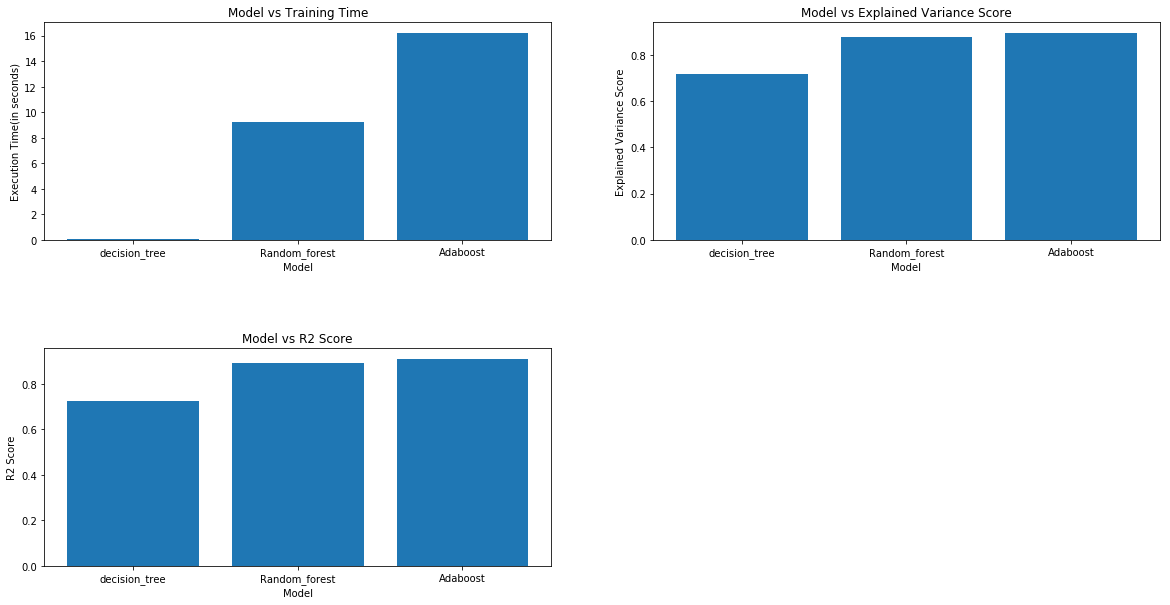

In [79]:
# Make plots here
# YOUR CODE HERE
ensemble_handler.plot_metric()
# raise NotImplementedError()

**Part 2 [15 points]:** This is an extension of HW4 problem on sentiment classification over reviews.

Here we make use DecisionTree ensembles to **classify** review as positive or negative

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split

In [81]:
reviews  = pd.read_csv('./data/reviews.csv')
train, test = train_test_split(reviews, test_size=0.2, random_state=4622)
X_train = train['reviews'].values
X_test = test['reviews'].values
y_train = train['sentiment']
y_test = test['sentiment']

**Part 2 A [10 points]:** Perform the following: 

* Create pipeline for `RandomForestClassifier` and `AdaBoostClassifier` as shown for `DecisionTreeClassifier` below. Refer to: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
* Fit the reviews dataset on the above models and report the results. (tune parameters of classifier for optimal performance)
* Use `n_estimators = 500` for both classifiers.

In [82]:
# Define tokenizer and create pipeline.
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)
en_stopwords = set(stopwords.words("english")) 
vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 2),
    stop_words = en_stopwords,
    min_df=10)

In [83]:
# create a handler for ensemble_test , use the created handler for fitting different models.
ensemble_classifier_handler = EnsembleTest(X_train,y_train,X_test,y_test,type='classification')

In [92]:
from sklearn.tree import DecisionTreeClassifier
pipeline_decision_tree = make_pipeline(vectorizer, DecisionTreeClassifier())
ensemble_classifier_handler.fit_model(pipeline_decision_tree,'decision tree classifier')

In [85]:
ensemble_classifier_handler.print_result()

   Execution time  Mean accuracy score                     Model  Precision
0         8.97375                0.687  decision tree classifier   0.689516


In [94]:
from sklearn.ensemble import RandomForestClassifier
# YOUR CODE HERE
pipeline_random_forest = make_pipeline(vectorizer, RandomForestClassifier(n_estimators=500))
print('Pipeline Random Forest: ', pipeline_random_forest)
# ensemble_classifier_handler.fit_model(pipeline_random_forest, 'Random forest classifier')
# raise NotImplementedError()

Pipeline Random Forest:  Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 2), preprocessor=None,
        stop_words...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


In [87]:
from sklearn.ensemble import AdaBoostClassifier
# YOUR CODE HERE
pipeline_adaboost = make_pipeline(vectorizer, AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500))
ensemble_classifier_handler.fit_model(pipeline_adaboost, 'Adaboost classifier')
# raise NotImplementedError()

**Part 2 B [5 points]:** Report results and make plots.

In [88]:
# Report results here
# YOUR CODE HERE
ensemble_classifier_handler.print_result()
# raise NotImplementedError()

   Execution time  Mean accuracy score                     Model  Precision
1       24.338506                0.871  Random forest classifier   0.885081
2        7.540494                0.707       Adaboost classifier   0.733871
0        8.973750                0.687  decision tree classifier   0.689516


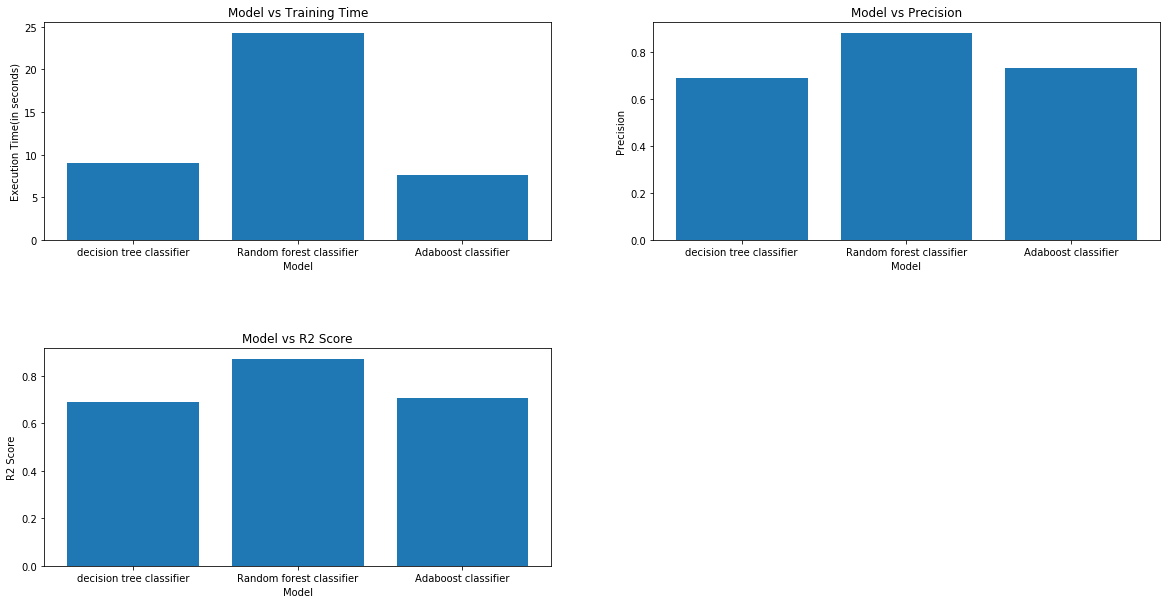

In [90]:
# Make plots here
# YOUR CODE HERE
ensemble_classifier_handler.plot_metric()
# raise NotImplementedError()

**Part 3 [10 points]:** In the following space below discuss at least one advantage and disadvantage for *Random Forest* and *AdaBoost*.

YOUR ANSWER HERE

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/T9VKL7UPWjWoYxVu6) to solicit your feedback for how to improve the course.